## Data exploration - oligodendroglia

In [1]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(gridExtra)
library(ggh4x)

Attaching SeuratObject

Attaching sp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### Re-save/load object

In [20]:
# save this embedding with updated clustering and metadata labels
saveRDS(ogd_pool, file = "/local/Nina/jupyterlab/brains_trans/ogd_pool_reg.rds")

In [2]:
# read in
ogd_pool <- readRDS(file = "/local/Nina/jupyterlab/brains_trans/ogd_pool_reg.rds")

### Plot with improved aesthetics

In [4]:
# restore "corrected" numeric labels
Idents(ogd_pool) <- ogd_pool$pc20_res0.6_clusters_numeric_edited

#### UMAP of detailed cell types

For the manuscript given the small size of the UMAP (on of the smaller subsets in Fig1) it will not be possible to display the full names on the UMAP, so I will display the number and then include the full cluster name as text in caption.

In this case since I have so few clusters, I will pick the colors semi-manually (based on rcolorBrewer RdPu pallette).


In [5]:
ogd_colors <- c("1" = "#fcc5c0", 
               "2" = "#fa9fb5", 
               "3" = "#fde0dd", 
               "4" = "#fff7f3"
              )

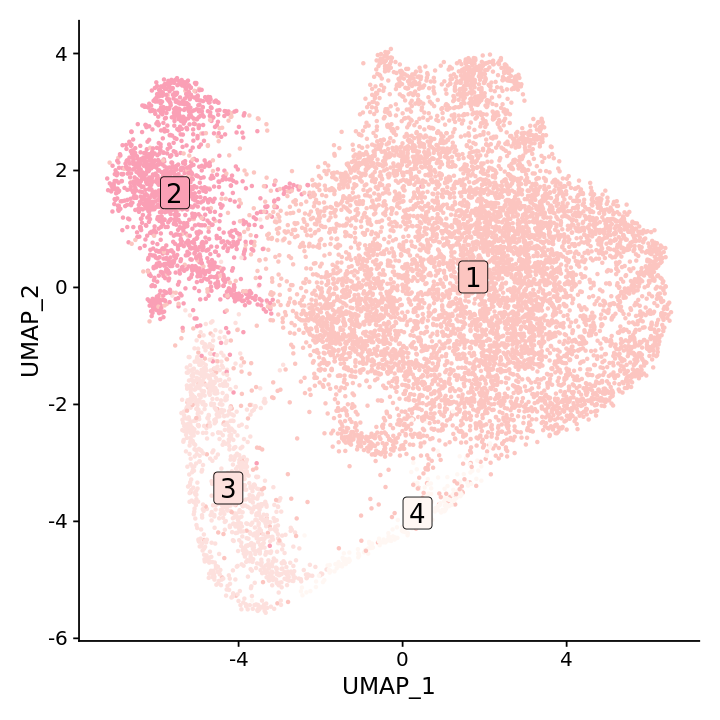

In [6]:
options(repr.plot.width=6, repr.plot.height=6)

umap_num <- DimPlot(ogd_pool, label = TRUE, cols = ogd_colors, 
        label.size = 5.5, label.box = TRUE, pt.size = 0.6, raster = FALSE) + NoLegend()
umap_num

In [7]:
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/ogd_umap_numbered.pdf", 
       plot = umap_num, 
       units = "in", height = 6, width = 6)


#### Cluster-specific markers

In [2]:
# record genes with specific spatial expression for each cluster (unique and shared with other clusters)
unique_markers <- list()
unique_markers[["cluster_0"]] <- c() # none unique
unique_markers[["cluster_1"]] <- c("atp1b1b", # this gene seen in a methanol fixation batch of RG 
                                   "hspa4a") # unique markers indicate diss response/technical variance
unique_markers[["cluster_2"]] <- c("asah1b")
unique_markers[["cluster_3"]] <- c("aplnra", "sema5a", "aplnrb", "gria2b", "scg3", "cxcl12a", "nptx1l")
unique_markers[["cluster_4"]] <- c("gpm6bb", "lgals2a", "c7b", "gpr17", "tnr", "vstm4b", "vcanb", "prom2")
unique_markers[["cluster_5"]] <- c("hbba1.1", "apoc1", "cd74a", "ccl34b.1", "snap25b") # these indicate either ambient contamination or doublets
unique_markers[["cluster_6"]] <- c() # none unique
unique_markers[["cluster_7"]] <- c("lgi3", "PPP1CC")
unique_markers[["cluster_8"]] <- c("mbpb", "mybphb", "cfl1l", "apoeb", "tcf7l2")
unique_markers[["cluster_9"]] <- c() # none unique

In [3]:
# shared across multiple
shared_markers <- list()
shared_markers[["cluster_0"]] <- c("cd59", "mbpa", "mpz", "glula", "plp1b", "cd9b", "elovl1b", #shared mostly with 1, 2, 5, 6, 7, 8, 9
                                  "csrp1b", "glipr2l", "fabp2", "tcima", "clic2", "sept5a", "sept8b" # shared with 1, 6, 2, 9
                                  )
shared_markers[["cluster_1"]] <- c("tuft1a") # shared with 0, 6, 2, 9
shared_markers[["cluster_2"]] <- c("vim", #some in 0/1
                                  "map4l", "gpt2l", "tuft1a", "clasp2" # shared with 0, 6, 1, 9
                                  )
shared_markers[["cluster_3"]] <- c("igsf9ba", "traf4a", "bcan", "dscamb", "slc1a2b") #shared with 4
shared_markers[["cluster_4"]] <- c("draxin", # partially shared with 3
                                  "slc1a4" # partially shared with 8
                                  )
shared_markers[["cluster_5"]] <- c("epd") # also hinting at contamination/doublets (due to wide spread expression more likely contamination)
shared_markers[["cluster_6"]] <- c() # large overlap with 0,1,2 markers already listed there
shared_markers[["cluster_7"]] <- c("crp1", "tegt")
shared_markers[["cluster_8"]] <- c("rhbdl3", "calm3a", "slc1a4", "caska")
shared_markers[["cluster_9"]] <- c() # large overlap with 0,1,2,6 markers already listed there

In [4]:
unique_markers_vector <- unlist(unique_markers)
unique_markers_vector <- unname(unique_markers_vector)
unique_markers_vector

[1] "atp1b1b"  "hspa4a"   "asah1b"   "aplnra"   "sema5a"   "aplnrb"  
 [7] "gria2b"   "scg3"     "cxcl12a"  "nptx1l"   "gpm6bb"   "lgals2a" 
[13] "c7b"      "gpr17"    "tnr"      "vstm4b"   "vcanb"    "prom2"   
[19] "hbba1.1"  "apoc1"    "cd74a"    "ccl34b.1" "snap25b"  "lgi3"    
[25] "PPP1CC"   "mbpb"     "mybphb"   "cfl1l"    "apoeb"    "tcf7l2"

In [5]:
shared_markers_vector <- unlist(shared_markers)
shared_markers_vector <- unname(shared_markers_vector)
#remove duplicates
shared_markers_vector <- unique(shared_markers_vector)
shared_markers_vector

[1] "cd59"    "mbpa"    "mpz"     "glula"   "plp1b"   "cd9b"    "elovl1b"
 [8] "csrp1b"  "glipr2l" "fabp2"   "tcima"   "clic2"   "sept5a"  "sept8b" 
[15] "tuft1a"  "vim"     "map4l"   "gpt2l"   "clasp2"  "igsf9ba" "traf4a" 
[22] "bcan"    "dscamb"  "slc1a2b" "draxin"  "slc1a4"  "epd"     "crp1"   
[29] "tegt"    "rhbdl3"  "calm3a"  "caska"

In [6]:
# plot together
all_markers_vector <- c(unique_markers_vector, shared_markers_vector)
all_markers_vector <- unique(all_markers_vector)

In [7]:
length(all_markers_vector)

[1] 62

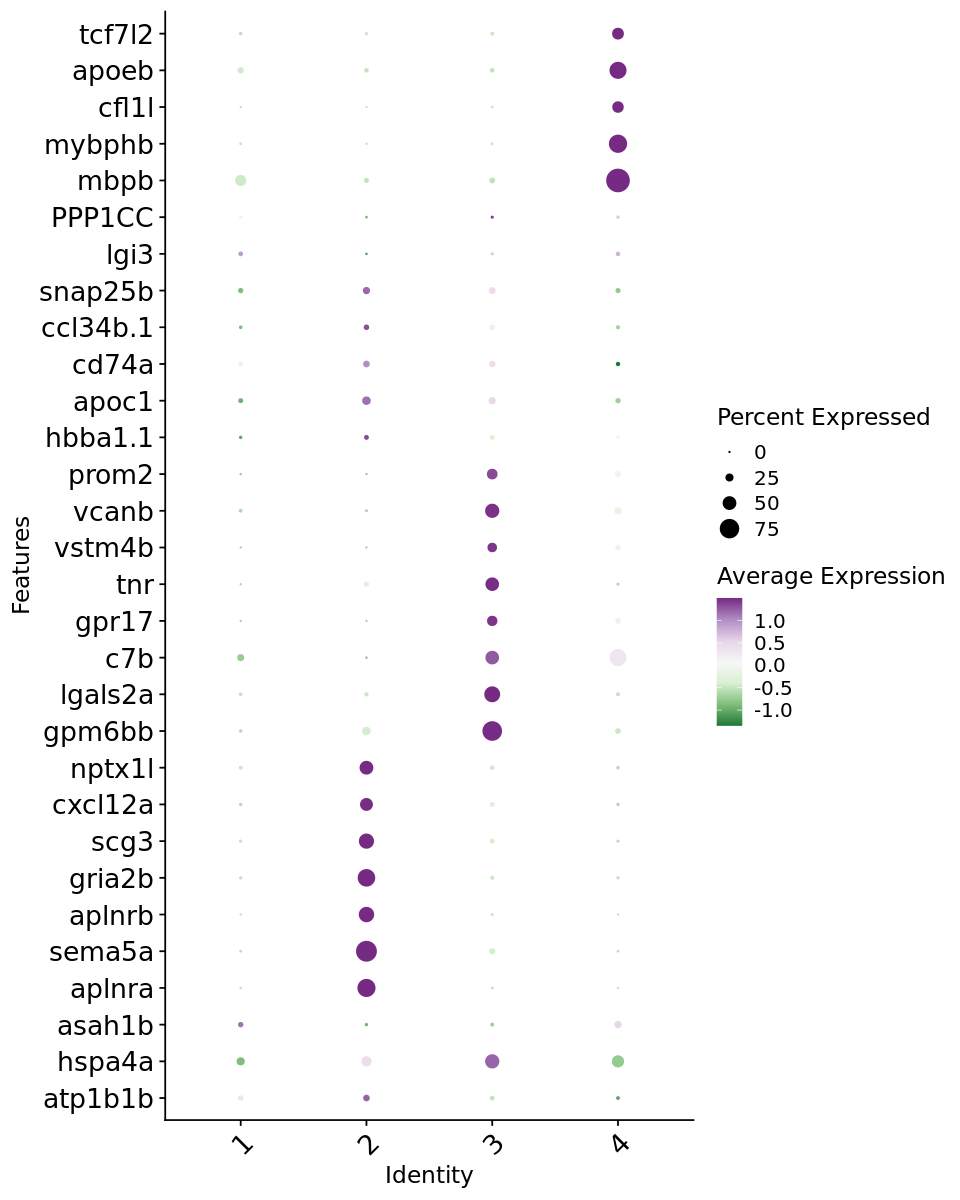

In [15]:
options(repr.plot.width=8, repr.plot.height=10)

dotplot_unique <- DotPlot(ogd_pool, features = unique_markers_vector, cols = "PRGn") + 
        theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16)) + 
        RotatedAxis() +
        coord_flip()
dotplot_unique

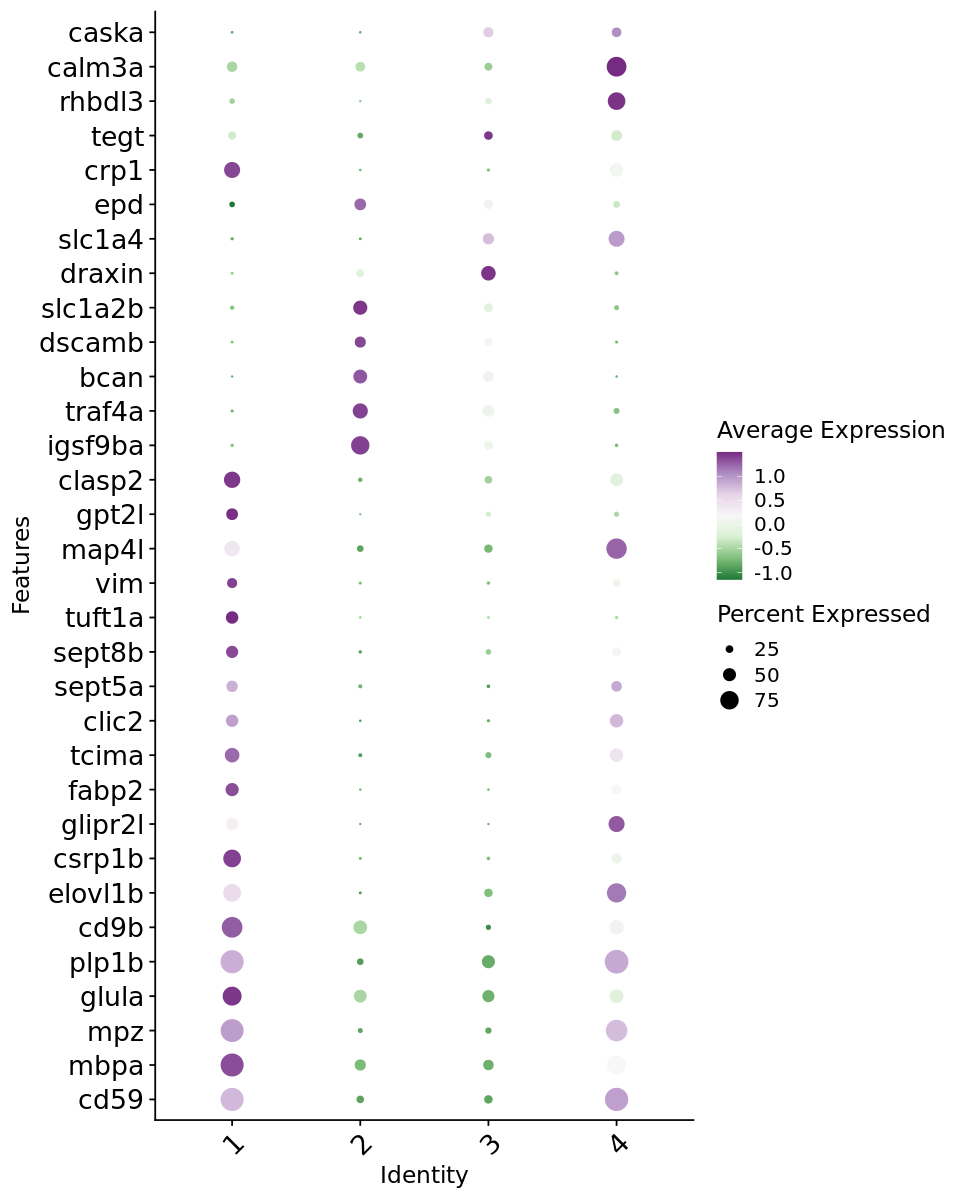

In [16]:
options(repr.plot.width=8, repr.plot.height=10)

dotplot_shared <- DotPlot(ogd_pool, features = shared_markers_vector, cols = "PRGn") + 
        theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16)) + 
        RotatedAxis() +
        coord_flip()
dotplot_shared

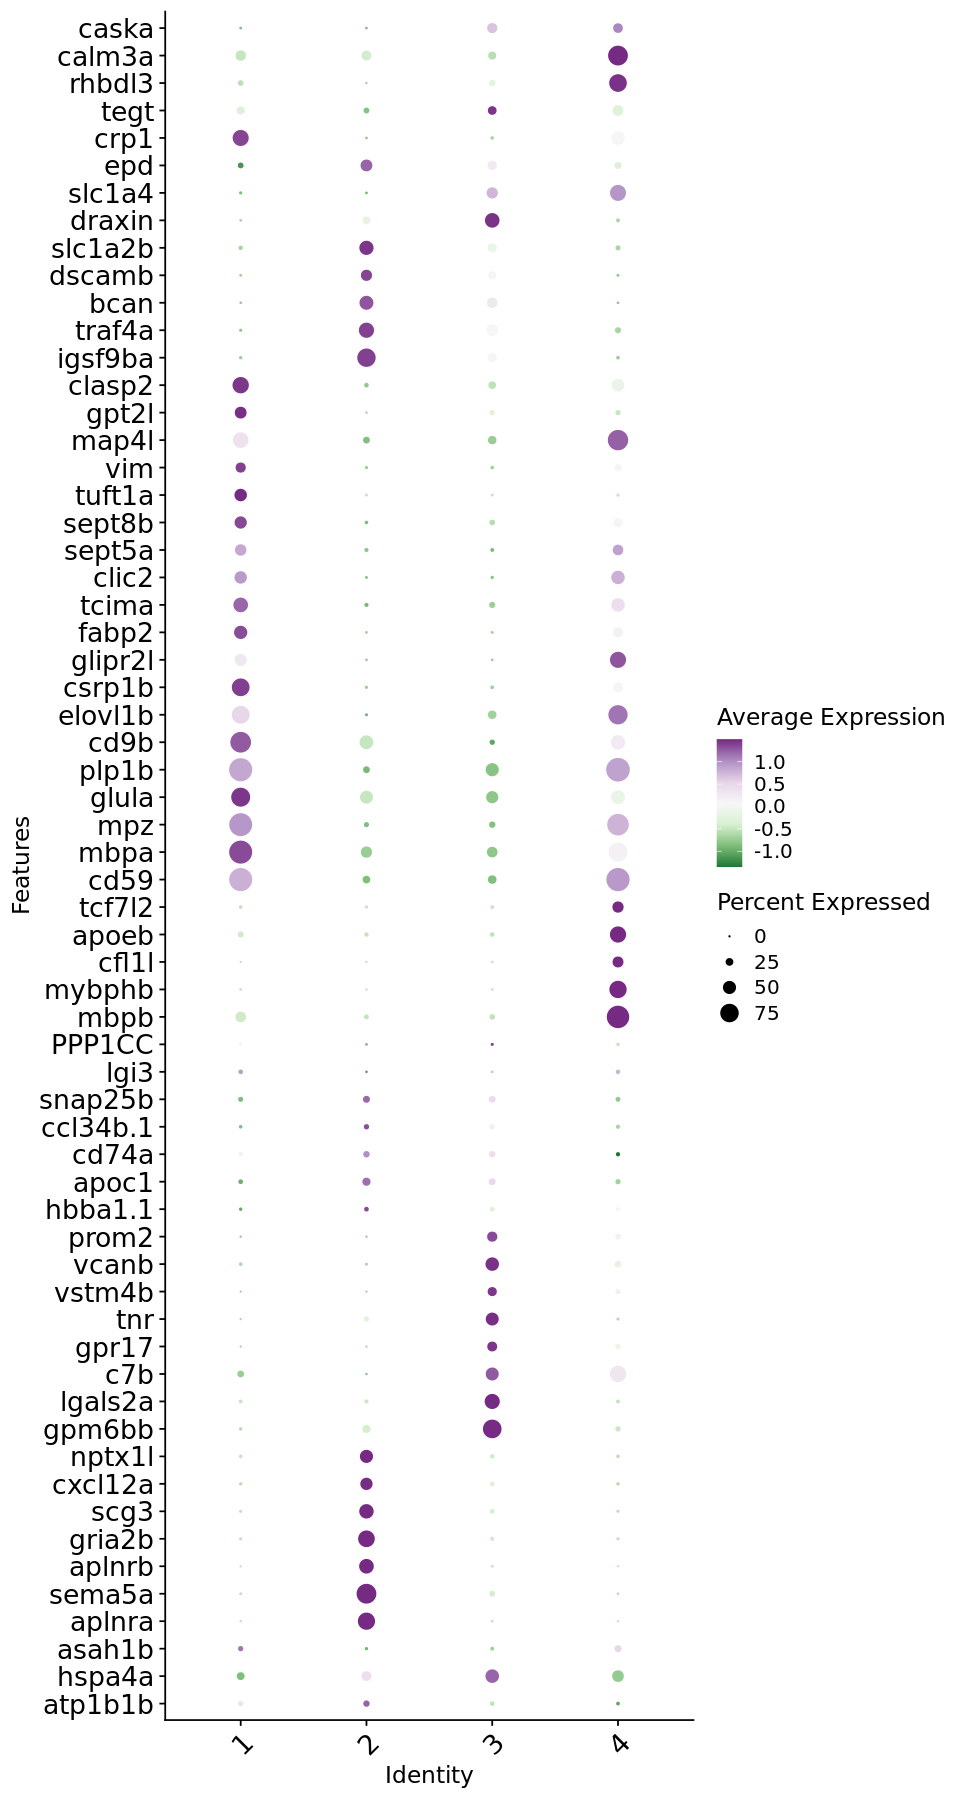

In [17]:
options(repr.plot.width=8, repr.plot.height=15)

dotplot_all <- DotPlot(ogd_pool, features = all_markers_vector, cols = "PRGn") + 
        theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16)) + 
        RotatedAxis() +
        coord_flip()
dotplot_all

In [ ]:
# more manually curated list of markers
ogd_markers_final <-

Include olig1 and gria4a in final marker plot (as I have references for them)

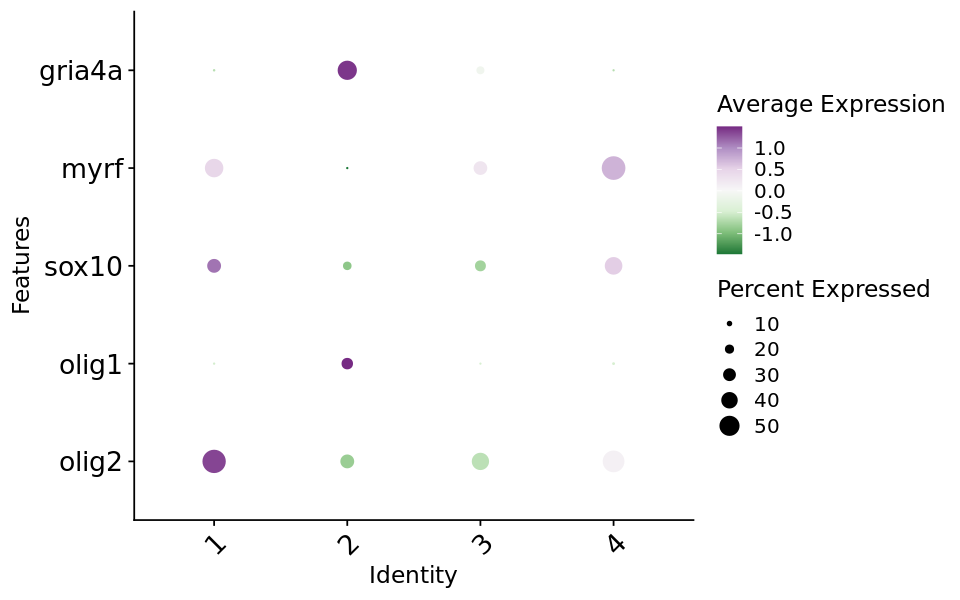

In [5]:
options(repr.plot.width=8, repr.plot.height=5)

# known markers from literature - explore
known_markers <- c("olig2", "olig1", "sox10", "myrf", "gria4a")

dotplot_known <- DotPlot(ogd_pool, features = known_markers, cols = "PRGn") + 
        theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16)) + 
        RotatedAxis() +
        coord_flip()
dotplot_known

#### Matching supplemental table

This is a list of marker genes that are included in the cell type markers supplemental table. The DotPlot will maybe also be included in the manuscript (depensing on space/narrative). If updating keep consistent with supplemental table.  

In [4]:
final_markers <- c("cd59", "mbpa", "mpz", "glula", "plp1b", "cd9b", 
                   "csrp1b",  "clasp2", "sept8b", "olig2", "fabp2",
                  "sema5a", "igsf9ba", "aplnra", "gria2b", "scg3", 
                   "aplnrb", "traf4a", "gria4a",  "cxcl12a", "nptx1l", "olig1", 
                  "gpm6bb", "lgals2a", "c7b", "tnr", "vcanb", "draxin", "gpr17", 
                  "mbpb", "calm3a", "map4l", "elovl1b", "mybphb", "apoeb")

In [5]:
length(final_markers)

[1] 35

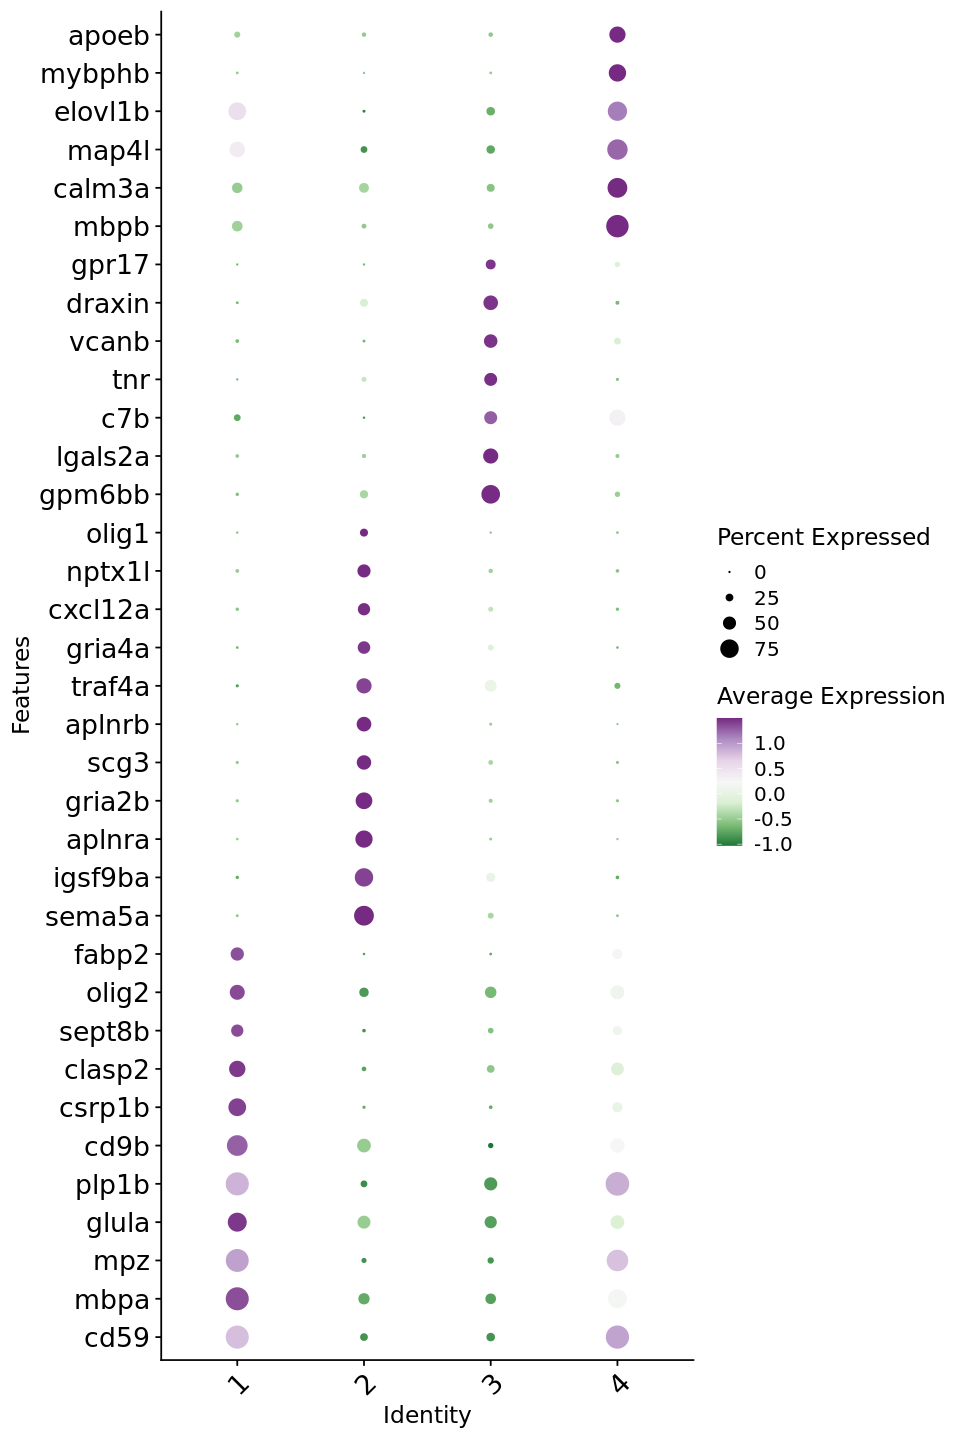

In [6]:
options(repr.plot.width=8, repr.plot.height=12)

dotplot_final <- DotPlot(ogd_pool, features = final_markers, cols = "PRGn") + 
        theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16)) + 
        RotatedAxis() +
        coord_flip()
dotplot_final

In [7]:
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/ogd_dotplot_supp.pdf", 
       plot = dotplot_final, 
       units = "in", height = 12, width = 8)


#### Fraction brain region per cluster

In [8]:
brain.reg.by.cluster <- table(ogd_pool$brain_reg, ogd_pool$pc20_res0.6_clusters_numeric_edited)

In [9]:
brain.reg.by.cluster.diss <- brain.reg.by.cluster[c(1:4),]
brain.reg.by.cluster.diss

      
          1    2    3    4
  dien 1708  314  115   37
  mes  2013  211  127   34
  rhom  711  129   90   22
  tel   188  203   93    3

In [10]:
#margin = 1 sums across rows (how is brain reg distributed over clusters)
brain.reg.by.cluster.diss.norm <- round(prop.table(brain.reg.by.cluster.diss, margin = 1), digits = 10) * 100

In [11]:
brain.reg.by.cluster.diss.norm

      
                1          2          3          4
  dien 78.5648574 14.4434223  5.2897884  1.7019319
  mes  84.4025157  8.8469602  5.3249476  1.4255765
  rhom 74.6848739 13.5504202  9.4537815  2.3109244
  tel  38.6036961 41.6837782 19.0965092  0.6160164

In [12]:
#margin = 2 sums across columns (which brain regs make up each cluster) - this is what I need for per cluster calculation
#use as input rowwise normalized data
brain.reg.by.cluster.diss.df <- as.data.frame(round(prop.table(brain.reg.by.cluster.diss.norm, margin = 2), digits = 10))
colnames(brain.reg.by.cluster.diss.df) <- c("Brain.reg", "Cluster", "Fraction")

In [13]:
head(brain.reg.by.cluster.diss.df)

,Brain.reg,Cluster,Fraction
,<fct>,<fct>,<dbl>
1,dien,1,0.2843916
2,mes,1,0.3055229
3,rhom,1,0.2703467
4,tel,1,0.1397389
5,dien,2,0.1839350
6,mes,2,0.1126649


In [15]:
p_br_diss <- ggplot(data = brain.reg.by.cluster.diss.df, aes(x = Cluster, y = Fraction, fill = Brain.reg)) +
    geom_bar(stat="identity") +  
    coord_cartesian(ylim = c(0,1)) + 
    labs(x="Cluster", y="Fraction") +  
    theme(axis.title = element_text(size = 18), axis.text = element_text(size = 16),   plot.title = element_text(size = 16, hjust = 0.5), legend.text = element_text(size = 20), legend.title = element_text(size = 22), legend.position = "bottom")  + 
    coord_flip() + 
    scale_fill_manual(values = reg_colors, name = "Brain region", limits = c("tel", "dien", "mes", "rhom"))

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



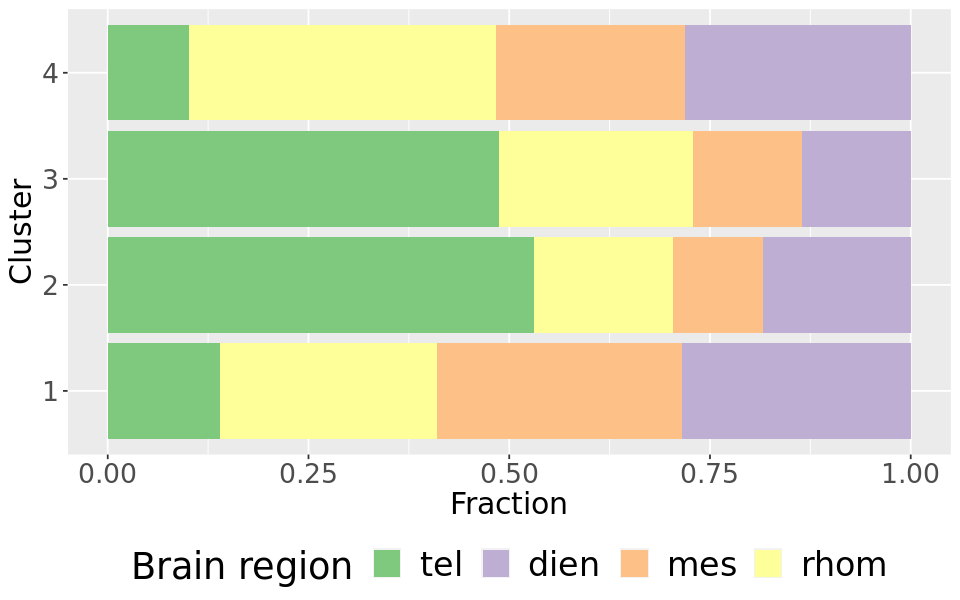

In [16]:
options(repr.plot.width=8, repr.plot.height=5)

p_br_diss

In [17]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/ogd_barplot_regions.pdf",
       plot = p_br_diss, units = "in", height = 5, width = 8)

#### Regional specificity for named cluster - set exact size

In [3]:
brain.reg.by.cluster <- table(ogd_pool$brain_reg, ogd_pool$pc20_res0.6_named_detailed_short_num)

In [4]:
brain.reg.by.cluster.diss <- brain.reg.by.cluster[c(1:4),]
brain.reg.by.cluster.diss

      
       1. OGD (mpz) 2. OPC 3. OGD (draxin) 4. OGD (mbpb)
  dien         1708    314             115            37
  mes          2013    211             127            34
  rhom          711    129              90            22
  tel           188    203              93             3

In [5]:
#margin = 1 sums across rows (how is brain reg distributed over clusters)
brain.reg.by.cluster.diss.norm <- round(prop.table(brain.reg.by.cluster.diss, margin = 1), digits = 10)
#brain.reg.by.cluster.norm <- brain.reg.by.cluster.perc1 * 100

In [6]:
brain.reg.by.cluster.diss.norm

      
       1. OGD (mpz)      2. OPC 3. OGD (draxin) 4. OGD (mbpb)
  dien  0.785648574 0.144434223     0.052897884   0.017019319
  mes   0.844025157 0.088469602     0.053249476   0.014255765
  rhom  0.746848739 0.135504202     0.094537815   0.023109244
  tel   0.386036961 0.416837782     0.190965092   0.006160164

In [7]:
#margin = 2 sums across columns (which brain regs make up each cluster) - this is what I need for per cluster calculation
#use as input rowwise normalized data
brain.reg.by.cluster.diss.df <- as.data.frame(round(prop.table(brain.reg.by.cluster.diss.norm, margin = 2), digits = 10))
colnames(brain.reg.by.cluster.diss.df) <- c("Brain.reg", "Cluster", "Fraction")

In [8]:
head(brain.reg.by.cluster.diss.df)

,Brain.reg,Cluster,Fraction
,<fct>,<fct>,<dbl>
1,dien,1. OGD (mpz),0.2843916
2,mes,1. OGD (mpz),0.3055229
3,rhom,1. OGD (mpz),0.2703467
4,tel,1. OGD (mpz),0.1397389
5,dien,2. OPC,0.1839350
6,mes,2. OPC,0.1126649


In [9]:
# pallette for brain regions based on https://colorbrewer2.org/#type=qualitative&scheme=Accent&n=5
reg_colors <- c("tel" = "#7fc97f", #green
                "dien" = "#beaed4", #purple
                "mes" = "#fdc086", #orange
                "rhom" = "#ffff99", #yellow
                "whole" = "#386cb0" #blue
                )

Use additional function from ggh4x package to define panel size (so I can keep bar size consistent across different datasets).  

In [10]:
# adjusted text sizes, no legend, no grid, with plot title
p_br_diss <- ggplot(data = brain.reg.by.cluster.diss.df, aes(x = Cluster, y = Fraction, fill = Brain.reg)) +
    geom_bar(stat="identity") + 
    coord_cartesian(ylim = c(0,1)) + 
    labs(x="", y="", title = "Oligodendroglia") +  
    theme(axis.title = element_text(size = 6), axis.text = element_text(size = 5), axis.text.x = element_text(angle = 45, hjust = 1, vjust = 0.95), plot.title = element_text(size = 7), 
        legend.position = "none",
        axis.text.y = element_blank(),
        panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_rect(fill = "white"))  +
    scale_fill_manual(values = reg_colors, name = "Brain region", limits = c("tel", "dien", "mes", "rhom")) +
    force_panelsizes(rows = unit(35, "mm"),
                   cols = unit(18, "mm"))

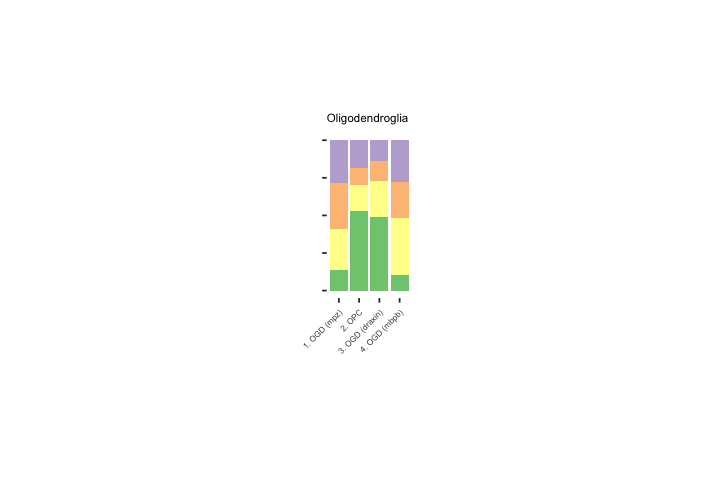

In [11]:
options(repr.plot.width=6, repr.plot.height=4)

p_br_diss

In [12]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/ogd_barplot_regions_setsize.pdf",
       plot = p_br_diss, units = "mm", height = 60, width = 25)

### Export annotation (detailed cell types)

In [3]:
dim(ogd_pool)

[1] 24332 10949

In [8]:
str(ogd_pool@meta.data)

ERROR: Error in str(ogd_pool@meta.data): object 'ogd_pool' not found


In [4]:
ogd_pool_ann <- data.frame("Barcode" = ogd_pool@assays$RNA@counts@Dimnames[[2]],
                          "Orig_ident" = ogd_pool$orig.ident,
                           "Brain_reg_lib" = ogd_pool$brain_reg,
                           "Fixation" = ogd_pool$fixation,
                          "Celltype_major" = ogd_pool$major_celltypes_pc28_res0.6,
                           "Celltype_detailed" = ogd_pool$pc20_res0.6_named_detailed,
                           "Celltype_detailed_short" = ogd_pool$pc20_res0.6_named_detailed_short,
                           "Keep_in_final" = TRUE
                          )

head(ogd_pool_ann)

,Barcode,Orig_ident,Brain_reg_lib,Fixation,Celltype_major,Celltype_detailed,Celltype_detailed_short,Keep_in_final
,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<lgl>
B1.T_AAGCGACTCAGGAG-1,B1.T_AAGCGACTCAGGAG-1,b1_tel,tel,fresh,Oligodendroglia,Oligodendrocytes (draxin),OGD (draxin),TRUE
B1.T_AATCCTTGGAATGA-1,B1.T_AATCCTTGGAATGA-1,b1_tel,tel,fresh,Oligodendroglia,Oligodendrocytes (mpz),OGD (mpz),TRUE
B1.T_ACATTCTGATCACG-1,B1.T_ACATTCTGATCACG-1,b1_tel,tel,fresh,Oligodendroglia,Oligodendrocytes (draxin),OGD (draxin),TRUE
B1.T_ACGCTGCTAAGCCT-1,B1.T_ACGCTGCTAAGCCT-1,b1_tel,tel,fresh,Oligodendroglia,Oligodendrocyte precursor cells,OPC,TRUE
B1.T_AGAGAAACTGGAAA-1,B1.T_AGAGAAACTGGAAA-1,b1_tel,tel,fresh,Oligodendroglia,Oligodendrocyte precursor cells,OPC,TRUE
B1.T_AGCAAAGACTCAGA-1,B1.T_AGCAAAGACTCAGA-1,b1_tel,tel,fresh,Oligodendroglia,Oligodendrocytes (mpz),OGD (mpz),TRUE


In [6]:
write.csv(ogd_pool_ann, file = "/local/Nina/jupyterlab/brains_trans/ann_ogd_pool_reg_20pcs_res0-6.csv")

### Explore markers at detailed cell type level
For the purpose of GO term/enrichment analysis, I find it more useful to recalculate differentially expressed genes based on the merged and (semi-)verified detailed cell types rather than Louvain clusters.

In [3]:
str(ogd_pool@meta.data)

'data.frame':	16387 obs. of  26 variables:
 $ orig.ident                         : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ nCount_RNA                         : num  870 822 662 2128 1073 ...
 $ nFeature_RNA                       : int  428 356 308 804 414 1169 680 1659 251 1273 ...
 $ multiseq.relative.1.7              : chr  NA NA NA NA ...
 $ brain_reg                          : chr  "tel" "tel" "tel" "tel" ...
 $ kit_chem                           : chr  "3prim_v1" "3prim_v1" "3prim_v1" "3prim_v1" ...
 $ fixation                           : chr  "fresh" "fresh" "fresh" "fresh" ...
 $ percent.mt                         : num  2.11 0.491 18.2982 0.5429 0.0656 ...
 $ ident                              : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ scDblFinder.class                  : chr  "singlet" "singlet" "singlet" "singlet" ...
 $ scDblFinder.score                  : num  0.0123 0.0873 0.1525 0.4752 0.2686 ...
 $ scDblFinder.weighted               : num  0.116 0.128 0.13

In [118]:
Idents(ogd_pool) <- "pc20_res0.6_named_detailed"

In [119]:
# find markers
ogd_pool.dct.markers.bimod <- FindAllMarkers(object = ogd_pool, only.pos = TRUE, min.pct = 0.2, logfc.threshold = 0.2, test.use = "bimod")
ogd_pool.dct.markers.bimod %>% group_by(cluster) %>% top_n(n = 2, wt = avg_log2FC)
write.csv(ogd_pool.dct.markers.bimod, file = "/local/Nina/jupyterlab/brains_trans/ogd_pool_markers/ogd_pool_reg_dct_20pcs_res0-6_markers_bimod.csv")

Calculating cluster Oligodendrocytes (mpz)

Calculating cluster Oligodendrocyte precursor cells

Calculating cluster Oligodendrocytes (draxin)

Calculating cluster Oligodendrocytes (mbpb)



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,4.338176,0.870,0.135,0.000000e+00,Oligodendrocytes (mpz),si:dkey-200l5.4
0.000000e+00,3.577925,0.957,0.210,0.000000e+00,Oligodendrocytes (mpz),mpz
0.000000e+00,4.342937,0.691,0.018,0.000000e+00,Oligodendrocyte precursor cells,aplnra
0.000000e+00,4.312453,0.811,0.043,0.000000e+00,Oligodendrocyte precursor cells,sema5a
0.000000e+00,4.295229,0.757,0.087,0.000000e+00,Oligodendrocytes (draxin),gpm6bb
0.000000e+00,3.931201,0.594,0.069,0.000000e+00,Oligodendrocytes (draxin),lgals2a
1.048965e-295,4.189457,0.934,0.322,2.552342e-291,Oligodendrocytes (mbpb),mbpb
7.073225e-203,3.548789,0.697,0.023,1.721057e-198,Oligodendrocytes (mbpb),mybphb


In [120]:
# sort markers in decending order by log2FC
ogd_pool.dct.markers.bimod <- ogd_pool.dct.markers.bimod %>% group_by(cluster) %>% arrange(desc(avg_log2FC), .by_group = TRUE)

In [121]:
levels(ogd_pool.dct.markers.bimod$cluster)

[1] "Oligodendrocytes (mpz)"          "Oligodendrocyte precursor cells"
[3] "Oligodendrocytes (draxin)"       "Oligodendrocytes (mbpb)"

In [122]:
# write separate txt file containing only genes for each cluster
for (celltype in levels(ogd_pool.dct.markers.bimod$cluster)){
 print(celltype)
 markers_sub <- ogd_pool.dct.markers.bimod[which(ogd_pool.dct.markers.bimod$cluster == celltype),]$gene
 filepath <- paste0("/local/Nina/jupyterlab/brains_trans/ogd_pool_markers/markers ",celltype,".txt")
 print(filepath)
 write.table(markers_sub, file = filepath, row.names = FALSE, quote = FALSE, col.names = FALSE)
}

[1] "Oligodendrocytes (mpz)"
[1] "/local/Nina/jupyterlab/brains_trans/ogd_pool_markers/markers Oligodendrocytes (mpz).txt"
[1] "Oligodendrocyte precursor cells"
[1] "/local/Nina/jupyterlab/brains_trans/ogd_pool_markers/markers Oligodendrocyte precursor cells.txt"
[1] "Oligodendrocytes (draxin)"
[1] "/local/Nina/jupyterlab/brains_trans/ogd_pool_markers/markers Oligodendrocytes (draxin).txt"
[1] "Oligodendrocytes (mbpb)"
[1] "/local/Nina/jupyterlab/brains_trans/ogd_pool_markers/markers Oligodendrocytes (mbpb).txt"
